In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
irp = pd.DataFrame(x)

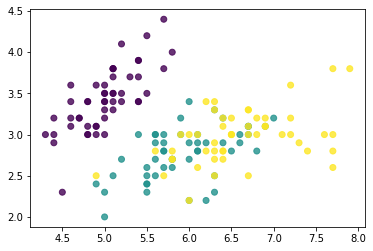

In [3]:
plt.scatter(irp.loc[:,0],irp.loc[:,1],c=y, alpha=0.8)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [6]:
print('Xtrain:',x_train.shape)
print('Xtest:',x_test.shape)

Xtrain: (120, 4)
Xtest: (30, 4)


Text(0.5, 1.0, 'Test set')

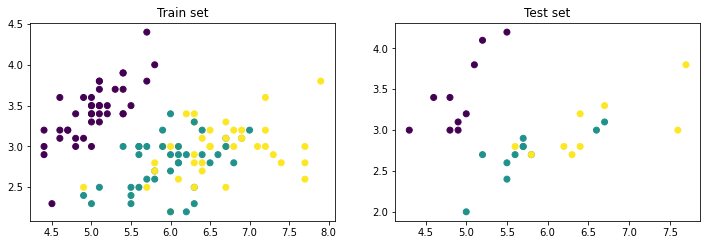

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title('Train set')
plt.subplot(2,2,2)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title('Test set')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

## Ameliorer un modèle
#### Cross_Validation():permet de tester le score du modèle tout en travaillant avec la validation set et un nombre iteratif d'argument

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(KNeighborsClassifier(4),x_train,y_train,cv=5,scoring='neg_mean_squared_error')

array([-0.04166667, -0.08333333, -0.08333333, -0.08333333, -0.08333333])

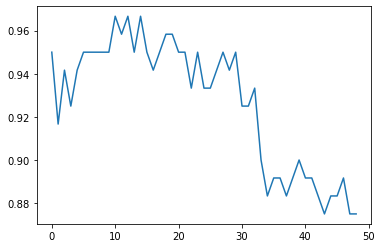

In [12]:
valeur_score = []
for i in range(1,50):
    score = cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5).mean()
    valeur_score.append(score)
plt.plot(valeur_score)

### Pas bésoin de toute cette boucle je peux juste utiliser la fonction Validation curve()

In [13]:
from sklearn.model_selection import validation_curve

/home/ferdio/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


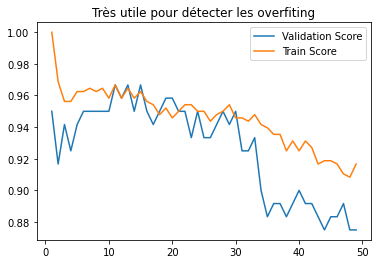

In [14]:
k= np.arange(1,50)
trainScore , valScore = validation_curve(KNeighborsClassifier(),x_train,y_train,
                                        'n_neighbors',k,cv=5)
plt.plot(k,valScore.mean(axis=1),label='Validation Score')
plt.plot(k,trainScore.mean(axis=1),label='Train Score')
plt.title('Très utile pour détecter les overfiting')
plt.legend()

### GridSearchCv() pour le score si le modèle dispose de nombreux hyperparamètres qui pourrait améliorer le modèle

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),parm_grid,cv=5)
grid.fit(x_train,y_train)
grid.score(x_train,y_train)

0.9583333333333334

In [17]:
## Necessaire pour les erreurs quadratique et absolue 
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [23]:
modelfinal = grid.best_estimator_
modelfinal.score(x_test,y_test)

0.9666666666666667

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,model.predict(x_test))
## Pour voir là ou les prédictions ont été mal fait

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]])

### LearningCurve() pour voir si le modèle pourrait être améliorer avec plus de données 

In [21]:
from sklearn.model_selection import learning_curve

array([ 9, 19, 28, 38, 48, 57, 67, 76, 86, 96])

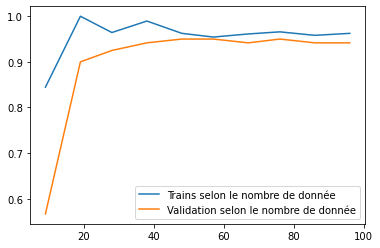

In [22]:
N , trains , vals = learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=5)
plt.plot(N,trains.mean(axis=1),label='Trains selon le nombre de donnée')
plt.plot(N,vals.mean(axis=1),label='Validation selon le nombre de donnée')
plt.legend()
N